## LOADING THE DATASET


In [1]:
# Install required packages
%pip install pyspark seaborn matplotlib pandas

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import required libraries
from pyspark.sql import SparkSession
import pandas as pd
import io

In [3]:
# Start Spark session
spark = SparkSession.builder.appName("KeplerExoplanet").getOrCreate()

25/04/25 15:54:56 WARN Utils: Your hostname, Dishas-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.1.101 instead (on interface en0)
25/04/25 15:54:56 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/04/25 15:54:56 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [ ]:
# Upload dataset
kepler_df = pd.read_csv("kepler.csv",skiprows=46) 
kepler_df.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_period,koi_period_err1,koi_period_err2,koi_depth,...,koi_smet_err2,koi_srad,koi_srad_err1,koi_srad_err2,koi_smass,koi_smass_err1,koi_smass_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,9.488036,2.775000e-05,-2.775000e-05,615.8,...,-0.15,0.927,0.105,-0.061,0.919,0.052,-0.046,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,54.418383,2.479000e-04,-2.479000e-04,874.8,...,-0.15,0.927,0.105,-0.061,0.919,0.052,-0.046,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,19.899140,1.494000e-05,-1.494000e-05,10829.0,...,-0.30,0.868,0.233,-0.078,0.961,0.110,-0.121,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,1.736952,2.630000e-07,-2.630000e-07,8079.2,...,-0.30,0.791,0.201,-0.067,0.836,0.093,-0.077,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,2.525592,3.761000e-06,-3.761000e-06,603.3,...,-0.30,1.046,0.334,-0.133,1.095,0.151,-0.136,288.75488,48.226200,15.509


In [ ]:
# Display all the columns
print(kepler_df.columns)

Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2',
       'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_sma', 'koi_sma_err1',
       'koi_sma_err2', 'koi_incl', 'koi_incl_err1', 'koi_incl_err2', 'koi_teq',
       'koi_teq_err1', 'koi_teq_err2', 'koi_insol', 'koi_insol_err1',
       'koi_insol_err2', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_smet', 'koi_smet_err1', 'koi_smet_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'koi_smass', 'koi_smass_err1',
       'koi_smass_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')


In [6]:
# Drop all columns that end with '_err1' or '_err2'
kepler_df = kepler_df.drop(columns=[col for col in kepler_df.columns if col.endswith('_err1') or col.endswith('_err2')])

In [7]:
print(kepler_df.columns)

Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_period', 'koi_depth', 'koi_prad',
       'koi_sma', 'koi_incl', 'koi_teq', 'koi_insol', 'koi_steff', 'koi_smet',
       'koi_srad', 'koi_smass', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')


### CORRELATION HEATMAP

### Creating a correaltion heatmap to select the relevant features

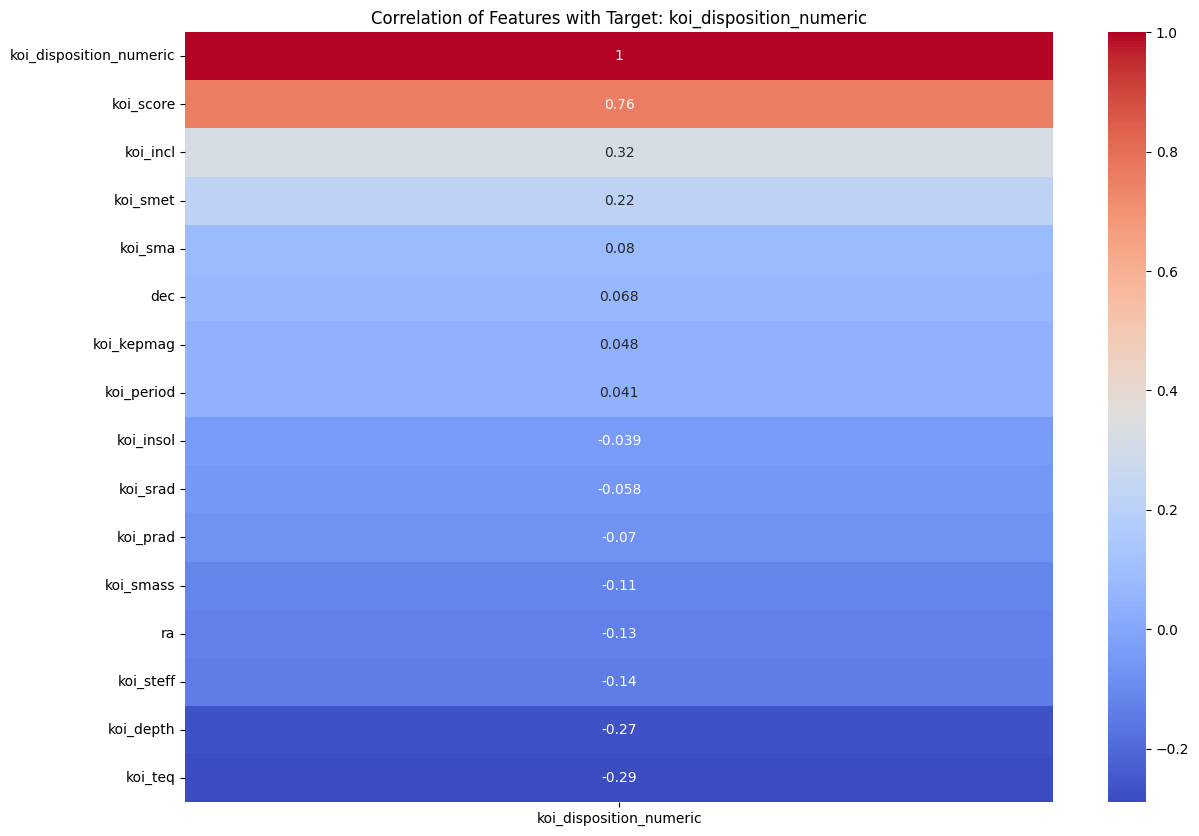

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = kepler_df.copy()

df['koi_disposition_numeric'] = df['koi_disposition'].map({'FALSE POSITIVE': 0, 'CONFIRMED': 1, 'CANDIDATE': 2})

drop_cols = ['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition', 'koi_pdisposition']
df_corr = df.drop(columns=drop_cols)

df_corr = df_corr.dropna()

corr_matrix = df_corr.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix[['koi_disposition_numeric']].sort_values(by='koi_disposition_numeric', ascending=False), 
            annot=True, cmap='coolwarm')
plt.title("Correlation of Features with Target: koi_disposition_numeric")
plt.show()


In [ ]:
# relevant columns after filtering
selected_columns = [
    'koi_disposition', 'koi_score', 'koi_period', 'koi_depth', 'koi_prad',
    'koi_teq', 'koi_steff', 'koi_smet', 'koi_srad', 'koi_smass'
]
kepler_df = kepler_df[selected_columns]

# renaming for better understanding
kepler_df.rename(columns={
    'koi_disposition': 'Disposition',
    'koi_score': 'Score',
    'koi_period': 'Orbital_Period',
    'koi_depth': 'Transit_Depth',
    'koi_prad': 'Planetary_Radius',
    'koi_teq': 'Equilibrium_Temp',
    'koi_steff': 'Stellar_Temp',
    'koi_smet': 'Stellar_Metallicity',
    'koi_srad': 'Stellar_Radius',
    'koi_smass': 'Stellar_Mass'
}, inplace=True)

kepler_df.head()


,Disposition,Score,Orbital_Period,Transit_Depth,Planetary_Radius,Equilibrium_Temp,Stellar_Temp,Stellar_Metallicity,Stellar_Radius,Stellar_Mass
0,CONFIRMED,1.000,9.488036,615.8,2.26,793.0,5455.0,0.14,0.927,0.919
1,CONFIRMED,0.969,54.418383,874.8,2.83,443.0,5455.0,0.14,0.927,0.919
2,CANDIDATE,0.000,19.899140,10829.0,14.60,638.0,5853.0,-0.18,0.868,0.961
3,FALSE POSITIVE,0.000,1.736952,8079.2,33.46,1395.0,5805.0,-0.52,0.791,0.836
4,CONFIRMED,1.000,2.525592,603.3,2.75,1406.0,6031.0,0.07,1.046,1.095


In [ ]:
# creating a pyspark dataframe for storing
spark_df = spark.createDataFrame(kepler_df)

In [ ]:
# display the dataframe
spark_df.printSchema()
spark_df.show(5)

root
 |-- Disposition: string (nullable = true)
 |-- Score: double (nullable = true)
 |-- Orbital_Period: double (nullable = true)
 |-- Transit_Depth: double (nullable = true)
 |-- Planetary_Radius: double (nullable = true)
 |-- Equilibrium_Temp: double (nullable = true)
 |-- Stellar_Temp: double (nullable = true)
 |-- Stellar_Metallicity: double (nullable = true)
 |-- Stellar_Radius: double (nullable = true)
 |-- Stellar_Mass: double (nullable = true)



+--------------+-----+--------------+-------------+----------------+----------------+------------+-------------------+--------------+------------+
|   Disposition|Score|Orbital_Period|Transit_Depth|Planetary_Radius|Equilibrium_Temp|Stellar_Temp|Stellar_Metallicity|Stellar_Radius|Stellar_Mass|
+--------------+-----+--------------+-------------+----------------+----------------+------------+-------------------+--------------+------------+
|     CONFIRMED|  1.0|    9.48803557|        615.8|            2.26|           793.0|      5455.0|               0.14|         0.927|       0.919|
|     CONFIRMED|0.969|    54.4183827|        874.8|            2.83|           443.0|      5455.0|               0.14|         0.927|       0.919|
|     CANDIDATE|  0.0|   19.89913995|      10829.0|            14.6|           638.0|      5853.0|              -0.18|         0.868|       0.961|
|FALSE POSITIVE|  0.0|   1.736952453|       8079.2|           33.46|          1395.0|      5805.0|              -0.52|

## DATA PREPROCESSING

In [ ]:

from pyspark.sql.functions import col, isnan, when, count
from pyspark.ml.feature import StringIndexer, VectorAssembler


In [ ]:

spark_df = spark_df.dropna()

In [14]:
# Index the target column (Disposition) to a numerical label
indexer = StringIndexer(inputCol="Disposition", outputCol="label")
spark_df = indexer.fit(spark_df).transform(spark_df)

In [ ]:

feature_cols = ["Orbital_Period",       
    "Transit_Depth",        
    "Planetary_Radius",     
    "Equilibrium_Temp",     
    "Stellar_Temp",         
    "Stellar_Metallicity",  
    "Stellar_Radius",       
    "Stellar_Mass"  ]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
final_df = assembler.transform(spark_df)

In [16]:
# Show the schema again to confirm the transformations
final_df.printSchema()
final_df.show(5)

root
 |-- Disposition: string (nullable = true)
 |-- Score: double (nullable = true)
 |-- Orbital_Period: double (nullable = true)
 |-- Transit_Depth: double (nullable = true)
 |-- Planetary_Radius: double (nullable = true)
 |-- Equilibrium_Temp: double (nullable = true)
 |-- Stellar_Temp: double (nullable = true)
 |-- Stellar_Metallicity: double (nullable = true)
 |-- Stellar_Radius: double (nullable = true)
 |-- Stellar_Mass: double (nullable = true)
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)

+--------------+-----+--------------+-------------+----------------+----------------+------------+-------------------+--------------+------------+-----+--------------------+
|   Disposition|Score|Orbital_Period|Transit_Depth|Planetary_Radius|Equilibrium_Temp|Stellar_Temp|Stellar_Metallicity|Stellar_Radius|Stellar_Mass|label|            features|
+--------------+-----+--------------+-------------+----------------+----------------+------------+------------------

## EDA(Exploratory Data Analysis)

In [ ]:

pdf = final_df.toPandas()

import seaborn as sns
import matplotlib.pyplot as plt

## HEATMAP

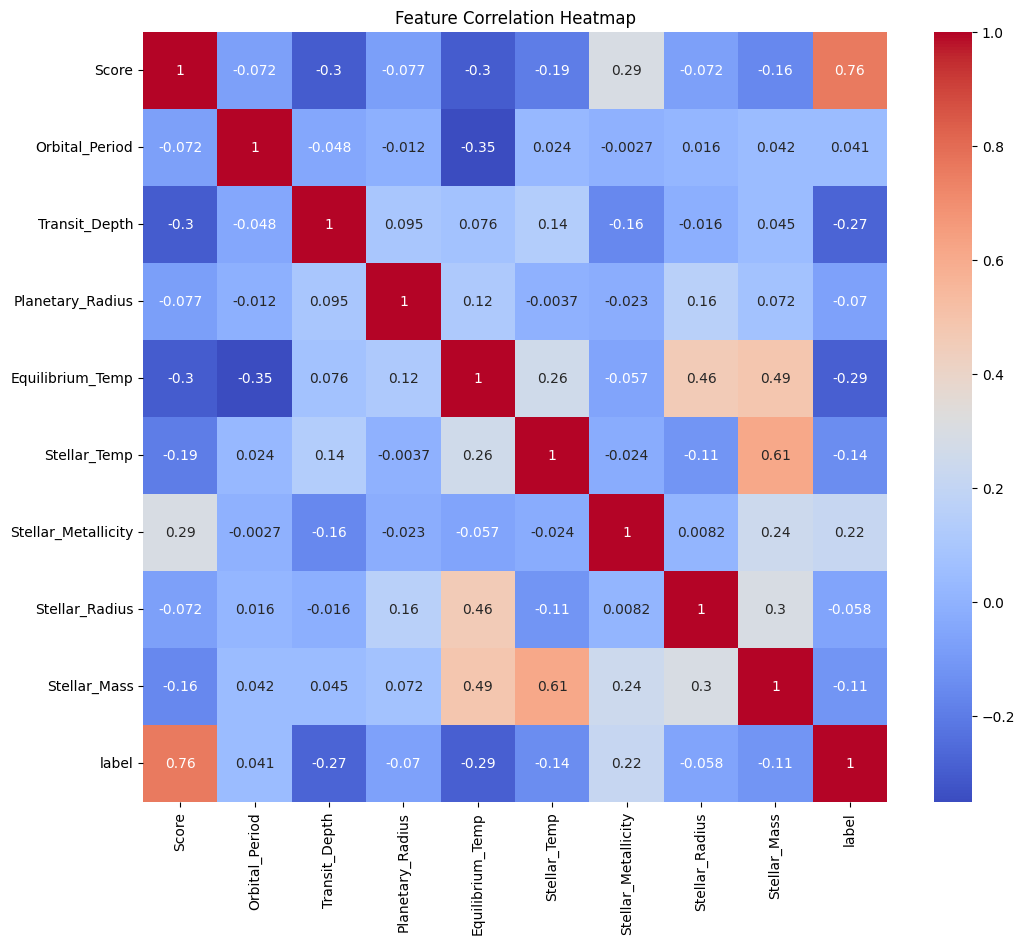

In [ ]:

plt.figure(figsize=(12,10))
sns.heatmap(pdf.corr(numeric_only=True), annot=True, cmap='coolwarm')  
plt.title("Feature Correlation Heatmap")
plt.show()

## COUNTPLOT

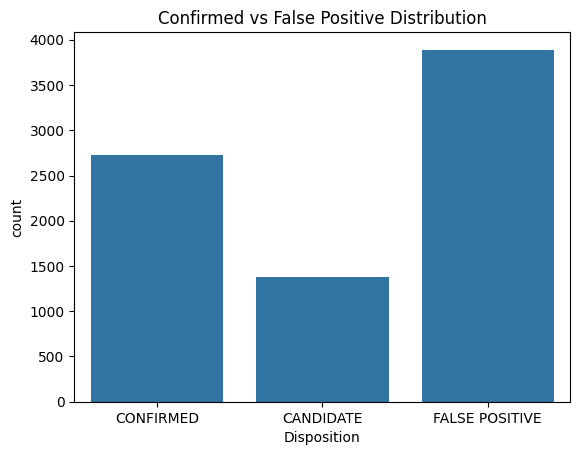

In [ ]:

sns.countplot(data=pdf, x='Disposition')
plt.title("Confirmed vs False Positive Distribution")
plt.show()

## BOX PLOT

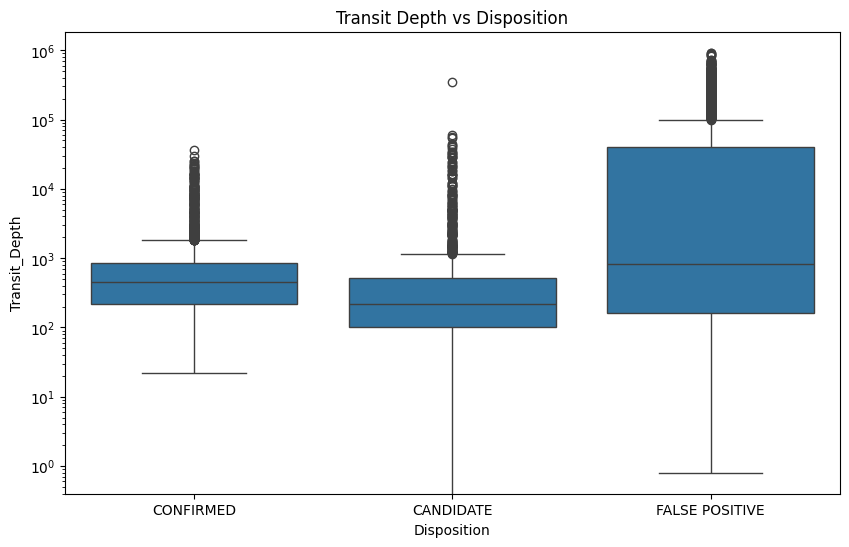

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=pdf, x='Disposition', y='Transit_Depth')
plt.title("Transit Depth vs Disposition")
plt.yscale('log')  
plt.show()


## VIOLIN PLOT

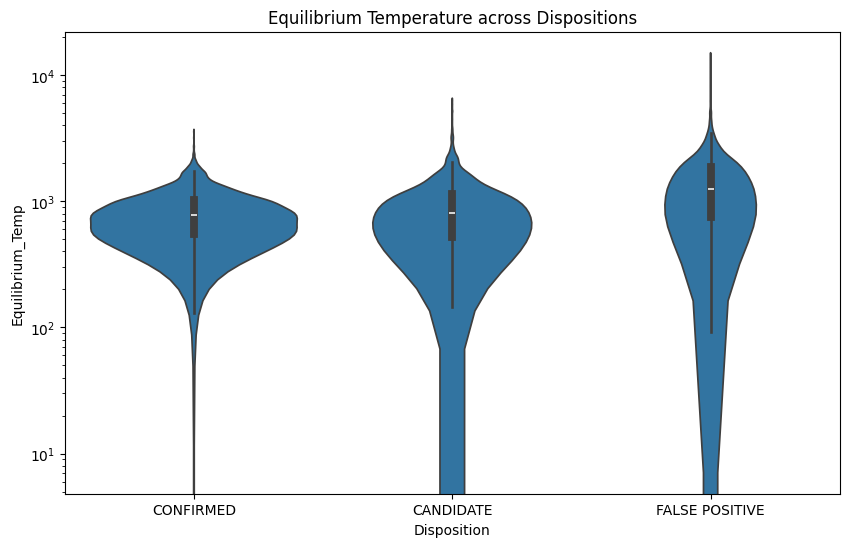

In [30]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=pdf, x='Disposition', y='Equilibrium_Temp')
plt.title("Equilibrium Temperature across Dispositions")
plt.yscale('log')
plt.show()


## ML MODELS

### CLASSIFICATION(RANDOM FOREST)

In [ ]:

from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

train_df, test_df = final_df.randomSplit([0.8, 0.2], seed=42)

rf = RandomForestClassifier(labelCol="label", featuresCol="features", numTrees=50)
model = rf.fit(train_df)

predictions = model.transform(test_df)

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print(f"Test Accuracy: {accuracy}")

f1_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")
f1_score = f1_evaluator.evaluate(predictions)
print(f"F1 Score: {f1_score}")


Test Accuracy: 0.7047496790757382
F1 Score: 0.6397004320105765


### USING CROSS VALIDATION

In [ ]:

from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

train_df, test_df = final_df.randomSplit([0.8, 0.2], seed=42)

rf = RandomForestClassifier(labelCol="label", featuresCol="features")

paramGrid = ParamGridBuilder() \
    .addGrid(rf.numTrees, [20, 50, 100]) \
    .addGrid(rf.maxDepth, [5, 10, 15]) \
    .build()

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="f1")

cv = CrossValidator(estimator=rf,
                    estimatorParamMaps=paramGrid,
                    evaluator=evaluator,
                    numFolds=5,
                    parallelism=2)  

cv_model = cv.fit(train_df)

best_model = cv_model.bestModel

predictions = best_model.transform(test_df)

accuracy_evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = accuracy_evaluator.evaluate(predictions)
f1_score = evaluator.evaluate(predictions)

print(f"Cross-Validated Test Accuracy: {accuracy}")
print(f"Cross-Validated F1 Score: {f1_score}")


25/04/25 15:55:11 WARN DAGScheduler: Broadcasting large task binary with size 1285.1 KiB
25/04/25 15:55:13 WARN DAGScheduler: Broadcasting large task binary with size 1285.1 KiB
25/04/25 15:55:13 WARN DAGScheduler: Broadcasting large task binary with size 1714.8 KiB
25/04/25 15:55:13 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors
25/04/25 15:55:13 WARN DAGScheduler: Broadcasting large task binary with size 2.1 MiB
25/04/25 15:55:13 WARN DAGScheduler: Broadcasting large task binary with size 2.6 MiB
25/04/25 15:55:14 WARN DAGScheduler: Broadcasting large task binary with size 3.0 MiB
25/04/25 15:55:14 WARN DAGScheduler: Broadcasting large task binary with size 3.4 MiB
25/04/25 15:55:15 WARN DAGScheduler: Broadcasting large task binary with size 2.3 MiB
25/04/25 15:55:15 WARN DAGSchedule

Cross-Validated Test Accuracy: 0.7432605905006419
Cross-Validated F1 Score: 0.727273488002413


### ANOMALY DETECTION(ISOLATION FOREST)

In [23]:
%pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


anomaly
 1    7829
-1     160
Name: count, dtype: int64
 Normal Points:
      Transit_Depth  Stellar_Temp  Stellar_Radius  Planetary_Radius  \
3969       4.433195      8.841014        1.467644          1.456287   
2404       5.002603      8.727616        0.915891          1.121678   
1937       5.889155      8.414939        0.543486          0.904218   
3515       6.179602      8.570165        0.660107          1.128171   
386        5.188503      8.678291        0.804241          0.982078   

      Equilibrium_Temp  anomaly  
3969          7.925880        1  
2404          6.405228        1  
1937          6.008813        1  
3515          7.506042        1  
386           7.213032        1  

Anomalies:
      Transit_Depth  Stellar_Temp  Stellar_Radius  Planetary_Radius  \
6302       6.470954      8.188689        4.598951          5.443845   
6404      12.713917      8.493925        1.522572          5.466286   
5772       6.193793      8.493720        2.966664          3.706965   
3

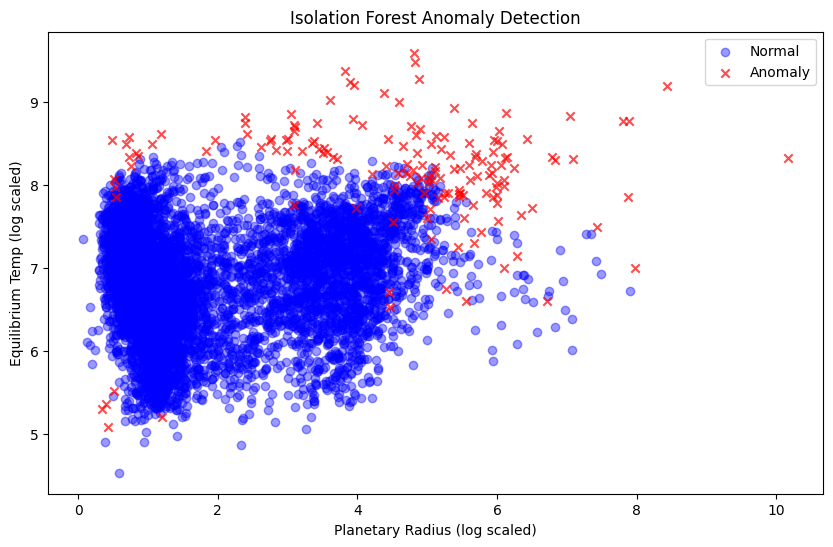

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

pdf_for_anomaly = final_df.select(
    "`Transit_Depth`", "`Stellar_Temp`", "`Stellar_Radius`", "`Planetary_Radius`", "`Equilibrium_Temp`"
).toPandas()

pdf_for_anomaly.replace([np.inf, -np.inf], np.nan, inplace=True)
pdf_for_anomaly.dropna(inplace=True)

for col in pdf_for_anomaly.columns:
    pdf_for_anomaly[col] = np.log1p(pdf_for_anomaly[col])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(pdf_for_anomaly)

model = IsolationForest(n_estimators=100, contamination=0.02, random_state=42)
model.fit(scaled_features)

pdf_for_anomaly['anomaly'] = model.predict(scaled_features)

print(pdf_for_anomaly['anomaly'].value_counts())


anomalies = pdf_for_anomaly[pdf_for_anomaly['anomaly'] == -1]
normal = pdf_for_anomaly[pdf_for_anomaly['anomaly'] == 1]

print(" Normal Points:")
print(normal.sample(5))  

print("\nAnomalies:")
print(anomalies.sample(5))  

# Visualize (Planetary Radius vs. Equilibrium Temp)
plt.figure(figsize=(10, 6))
plt.scatter(normal['Planetary_Radius'], normal['Equilibrium_Temp'], c='blue', label='Normal', alpha=0.4)
plt.scatter(anomalies['Planetary_Radius'], anomalies['Equilibrium_Temp'], c='red', label='Anomaly', alpha=0.7, marker='x')
plt.xlabel("Planetary Radius (log scaled)")
plt.ylabel("Equilibrium Temp (log scaled)")
plt.title("Isolation Forest Anomaly Detection")
plt.legend()
plt.show()


